# Loan Prediction Problem¶
A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender,Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data loading and cleaning

In [2]:
# Loading dataset
data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

#Let's Make copy of the original datasets so we do not hamper the original datasets. 

In [3]:
data_original = data.copy()

In [4]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


## Data Cleaning - Checking and working with missing value

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Exploratory Data Analysis¶

In [6]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: title={'center': 'Loan Status'}, xlabel='Loan_Status'>

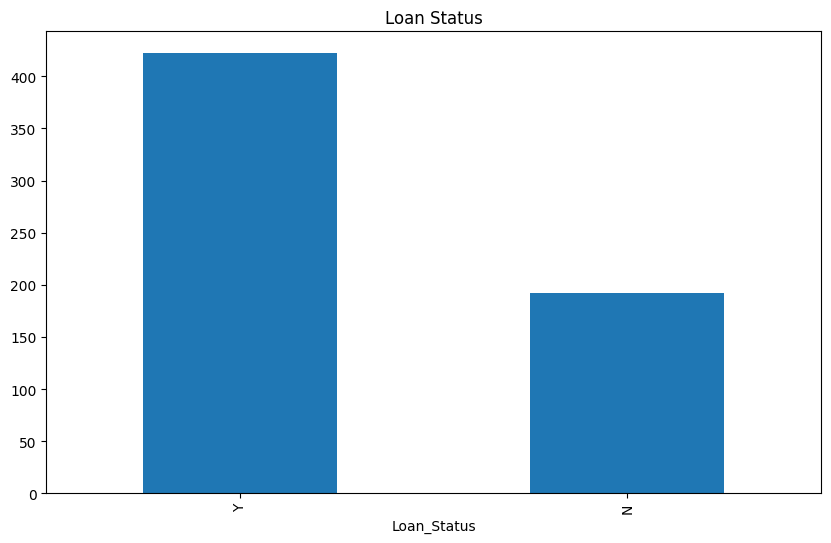

In [7]:
data['Loan_Status'].value_counts().plot.bar(figsize=(10,6), title='Loan Status')

# The loan of 422(around 69%) people out of 614 was approved.

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

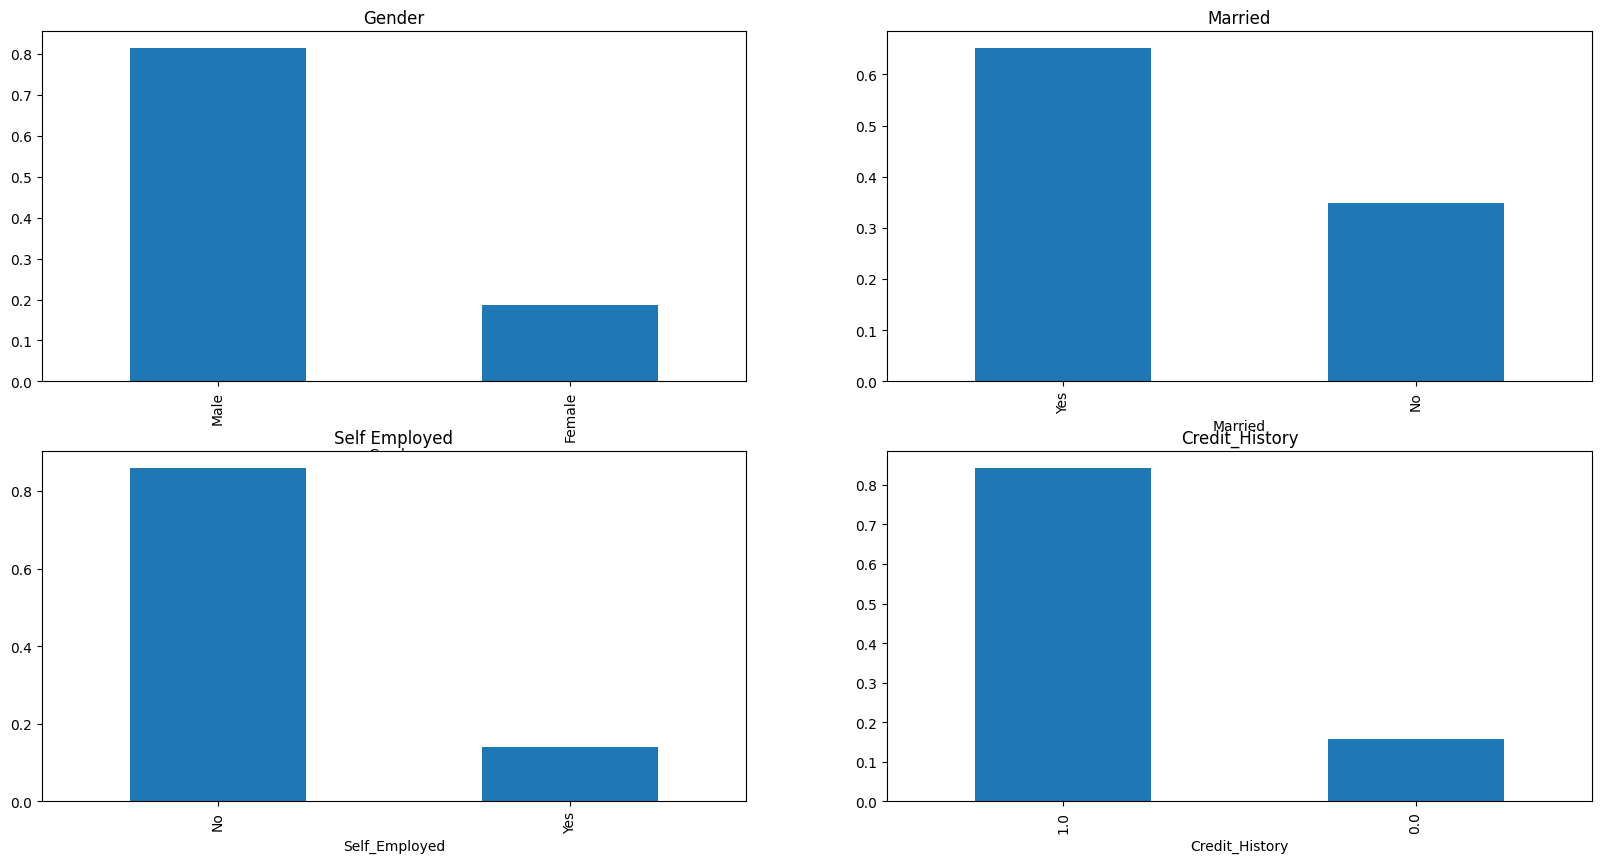

In [8]:
plt.figure(1)
plt.subplot(221)
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self Employed')
plt.subplot(224)
data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

- 80% applicants in the dataset are male.
- Around 65% people are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

<Axes: title={'center': 'Property Area'}, xlabel='Property_Area'>

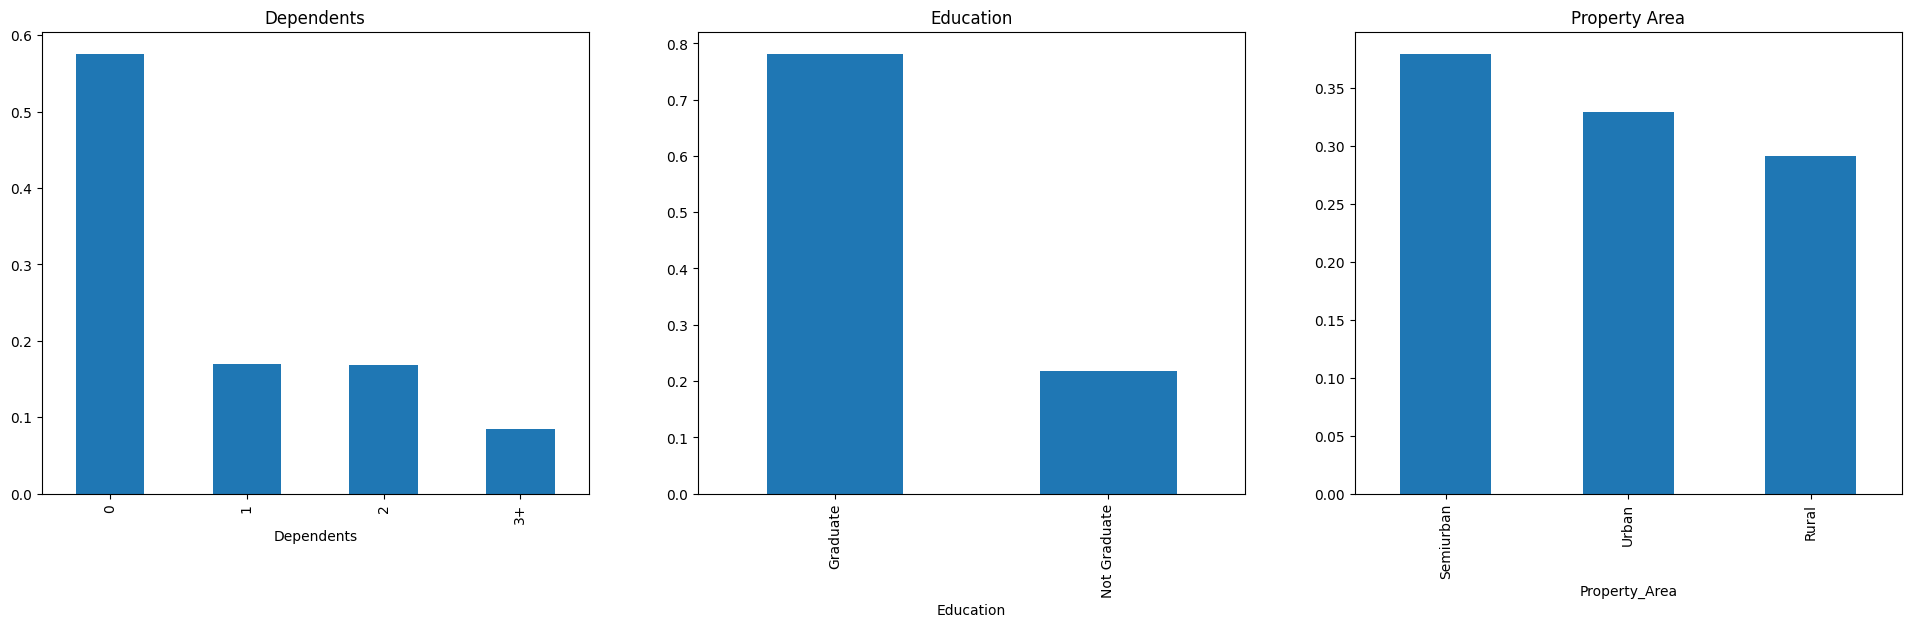

In [9]:
plt.figure(1)
plt.subplot(131)
data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')

- Most of the applicants don't have dependents.
- Around 80% of the applicants are graduate.
- Most of the applicants are from Semiurban area.

C:\Users\xyzen\AppData\Local\Temp\ipykernel_33660\1418260839.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'])
d:\Users\xyzen\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

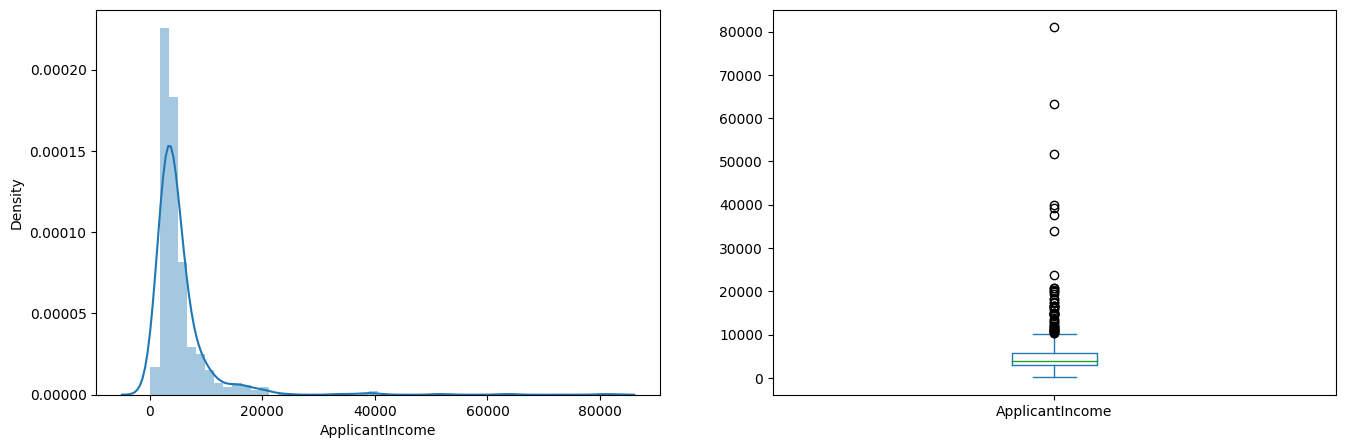

In [10]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['ApplicantIncome'])
plt.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(16,5))

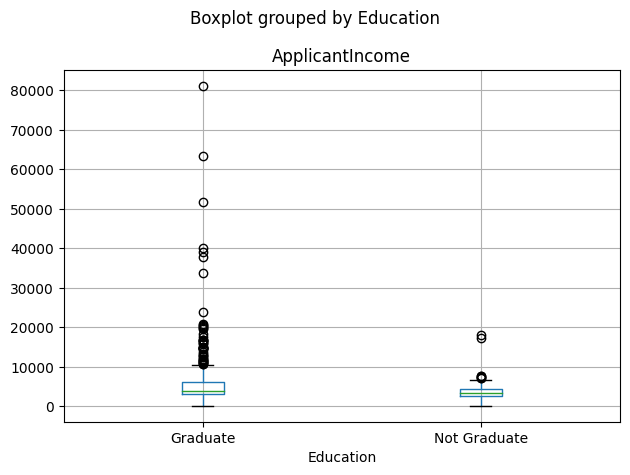

In [11]:
data.boxplot(column= 'ApplicantIncome', by='Education')
plt.tight_layout()

### There are higher number of graduates with very high incomes which are appearing to be outliers.

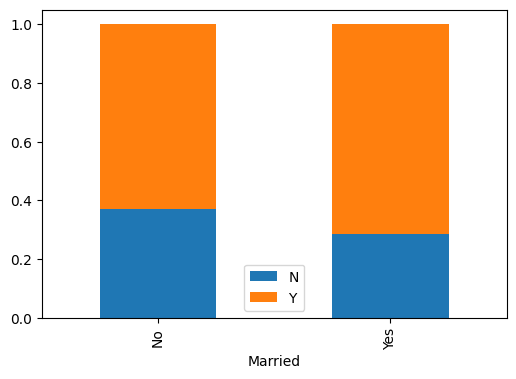

In [12]:
Married = pd.crosstab(data['Married'], data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

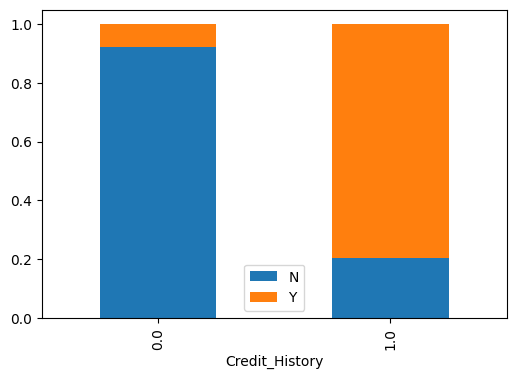

In [13]:
Credit_History = pd.crosstab(data['Credit_History'], data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

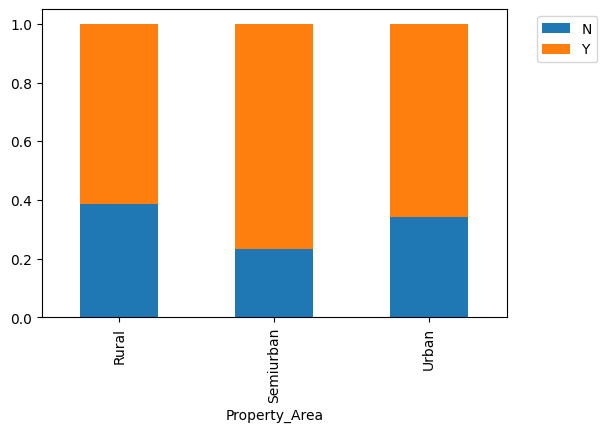

In [14]:
Property_Area = pd.crosstab(data['Property_Area'], data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

- Proportion of married applicants is higher for the approved loans.
- People with credit history as 1 are more likely to get their loan approved.
- Proportion of loans getting approved in semiurban area is higher compared to rural or urban area.

In [10]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
bins = [0,2500,4000,6000,81000] 
group= ['Low', 'Average', 'High', 'Very High']
data['Total_Income_bin'] = pd.cut(data['Total_Income'], bins, labels=group)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,High
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Very High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Very High


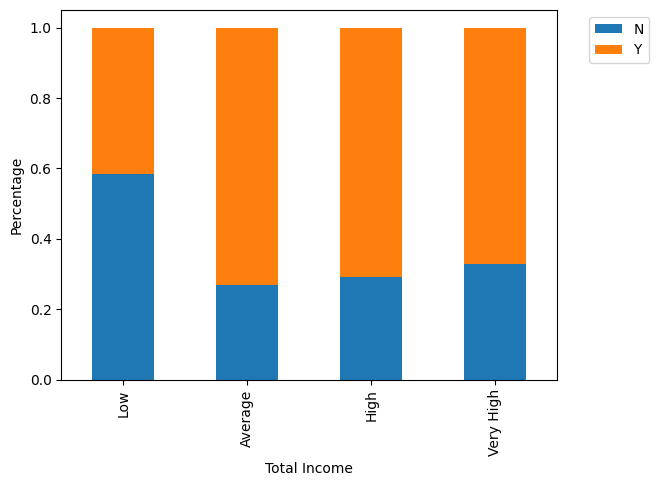

In [11]:
Total_Income_bin = pd.crosstab(data['Total_Income_bin'], data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

### Proportions of loan getting approvals for applicants having low Total_Income is very less compared to that of applicants with Average, High and Very High income.

In [12]:
data = data.drop(['Total_Income', 'Total_Income_bin', 'Loan_ID'], axis=1)

In [13]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
data['Dependents'].replace('3+', 3, inplace=True)
data['Loan_Status'].replace('N', 0, inplace=True)
data['Loan_Status'].replace('Y', 1, inplace=True)

C:\Users\xyzen\AppData\Local\Temp\ipykernel_2324\1954821033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Dependents'].replace('3+', 3, inplace=True)
C:\Users\xyzen\AppData\Local\Temp\ipykernel_2324\1954821033.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

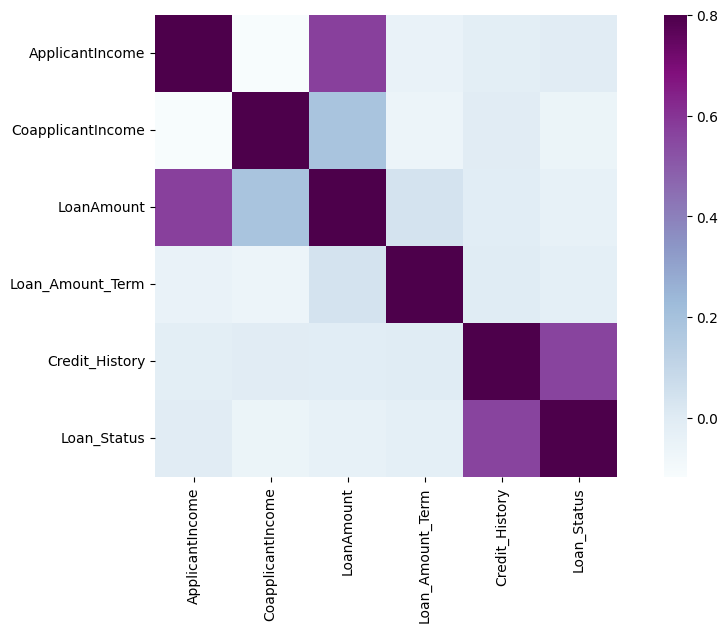

In [16]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, vmax=0.8, square=True, cmap='BuPu')
plt.show()

### We can see that most correlated variables are (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

# Data Cleaning¶

In [17]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# We impute missing values with mean, mode, median.
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

C:\Users\xyzen\AppData\Local\Temp\ipykernel_2324\848845119.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
C:\Users\xyzen\AppData\Local\Temp\ipykernel_2324\848845119.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [19]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Model Building

In [20]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [26]:
X.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban


In [27]:
y.head(3)

0    1
1    0
2    1
Name: Loan_Status, dtype: int64

In [21]:
X = pd.get_dummies(X, columns=['Gender', 'Married', 'Education', 'Property_Area', 'Self_Employed'])
X.head(3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
0,0,5849,0.0,128.0,360.0,1.0,False,True,True,False,True,False,False,False,True,True,False
1,1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,True,False,True,False,False,True,False
2,0,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,True


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier(random_state=1)

In [33]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [34]:
predictions = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        51
           1       0.82      0.82      0.82       134

    accuracy                           0.74       185
   macro avg       0.68      0.68      0.68       185
weighted avg       0.74      0.74      0.74       185



In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfmodel = RandomForestClassifier(n_estimators=500)

In [39]:
rfmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [40]:
rfpredictions = rfmodel.predict(X_test)

In [41]:
print(classification_report(y_test, rfpredictions))

              precision    recall  f1-score   support

           0       0.69      0.43      0.53        51
           1       0.81      0.93      0.86       134

    accuracy                           0.79       185
   macro avg       0.75      0.68      0.70       185
weighted avg       0.78      0.79      0.77       185



In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gbm_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)  
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)

print(classification_report(y_test, gbm_predictions))

              precision    recall  f1-score   support

           0       0.72      0.55      0.62        51
           1       0.84      0.92      0.88       134

    accuracy                           0.82       185
   macro avg       0.78      0.73      0.75       185
weighted avg       0.81      0.82      0.81       185



Analyzing the latest results from the decision tree, random forest, and GBM models, we can draw the following conclusions:

Decision Tree:

It shows balanced performance for the class of customers with loan eligibility (class 1), with a precision of 0.82 and a recall of 0.80. However, for customers without loan eligibility (class 0), it shows only moderate performance, with lower recall.

Random Forest:

Exhibits an improvement over the decision tree, particularly for class 0, with higher precision.
It maintains strong performance for class 1 with a very high recall of 0.93, indicating most eligible customers are correctly identified.

Gradient Boosting Machine (GBM):

Demonstrates the best performance among the three models for class 1, with the highest recall of 0.96, meaning it identifies almost all customers with loan eligibility.

For class 0, the precision and recall are comparable to the random forest, indicating a balanced ability to correctly identify customers without loan eligibility.

In conclusion, the GBM model appears to be the best performer for this task, particularly for identifying eligible customers (class 1). It offers a good balance between precision and recall for both classes, indicating a robust model for this specific dataset. The random forest also shows strong performance, especially for class 1, but with a slight trade-off in class 0's recall. The decision tree provides a simpler model with reasonable performance but doesn't match the other two models' effectiveness.

The choice between these models should be based on the specific requirements of the business application. For instance:

If minimizing false positives is crucial (avoiding loans to ineligible customers), the random forest might be preferred.
If maximizing the identification of eligible customers is the goal, GBM would be the model of choice due to its higher recall for class 1.
Businesses must also consider the cost implications of false positives and false negatives, regulatory compliance, and the importance of model interpretability when making their final decision.


# Performed causal inference to identify other variables influence on loan eligibility

In [22]:
y_ci = y
t_ci = X['Credit_History']
X_ci = X.drop(columns=['Credit_History'])

In [23]:
X_ci.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
0,0,5849,0.0,128.0,360.0,False,True,True,False,True,False,False,False,True,True,False
1,1,4583,1508.0,128.0,360.0,False,True,False,True,True,False,True,False,False,True,False
2,0,3000,0.0,66.0,360.0,False,True,False,True,True,False,False,False,True,False,True
3,0,2583,2358.0,120.0,360.0,False,True,False,True,False,True,False,False,True,True,False
4,0,6000,0.0,141.0,360.0,False,True,True,False,True,False,False,False,True,True,False


In [24]:
t_ci.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Credit_History, dtype: float64

In [25]:
y_ci.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

First Method: ATE

In [26]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(solver='lbfgs')
logit_model.fit(X_ci, t_ci)
X_ci['propensity_score'] = logit_model.predict_proba(X_ci)[:, 1]

d:\Users\xyzen\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
X_ci.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes,propensity_score
0,0,5849,0.0,128.0,360.0,False,True,True,False,True,False,False,False,True,True,False,0.860565
1,1,4583,1508.0,128.0,360.0,False,True,False,True,True,False,True,False,False,True,False,0.871086
2,0,3000,0.0,66.0,360.0,False,True,False,True,True,False,False,False,True,False,True,0.864520
3,0,2583,2358.0,120.0,360.0,False,True,False,True,False,True,False,False,True,True,False,0.816603
4,0,6000,0.0,141.0,360.0,False,True,True,False,True,False,False,False,True,True,False,0.860412


In [28]:
t_ci.value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [29]:
X_ci['t_ci'] = t_ci
X_ci['y_ci'] = y_ci

In [30]:
X_ci.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes,propensity_score,t_ci,y_ci
0,0,5849,0.0,128.0,360.0,False,True,True,False,True,False,False,False,True,True,False,0.860565,1.0,1
1,1,4583,1508.0,128.0,360.0,False,True,False,True,True,False,True,False,False,True,False,0.871086,1.0,0
2,0,3000,0.0,66.0,360.0,False,True,False,True,True,False,False,False,True,False,True,0.864520,1.0,1
3,0,2583,2358.0,120.0,360.0,False,True,False,True,False,True,False,False,True,True,False,0.816603,1.0,1
4,0,6000,0.0,141.0,360.0,False,True,True,False,True,False,False,False,True,True,False,0.860412,1.0,1


In [31]:
from sklearn.neighbors import NearestNeighbors

treated = X_ci[X_ci['t_ci'] == 1.0]
control = X_ci[X_ci['t_ci'] != 1.0]


In [32]:
treated.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes,propensity_score,t_ci,y_ci
0,0,5849,0.0,128.0,360.0,False,True,True,False,True,False,False,False,True,True,False,0.860565,1.0,1
1,1,4583,1508.0,128.0,360.0,False,True,False,True,True,False,True,False,False,True,False,0.871086,1.0,0
2,0,3000,0.0,66.0,360.0,False,True,False,True,True,False,False,False,True,False,True,0.864520,1.0,1
3,0,2583,2358.0,120.0,360.0,False,True,False,True,False,True,False,False,True,True,False,0.816603,1.0,1
4,0,6000,0.0,141.0,360.0,False,True,True,False,True,False,False,False,True,True,False,0.860412,1.0,1


In [33]:
treated.shape, control.shape

((525, 19), (89, 19))

In [34]:
#let control match treated
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(control[['propensity_score']])
indices = neigh.kneighbors(treated[['propensity_score']], return_distance=False)

matched = control.iloc[indices.flatten()]


In [43]:
matched.shape

(525, 19)

In [44]:
treated['propensity_score'].describe()

count    525.000000
mean       0.854811
std        0.036641
min        0.696252
25%        0.834382
50%        0.863855
75%        0.880107
max        0.906688
Name: propensity_score, dtype: float64

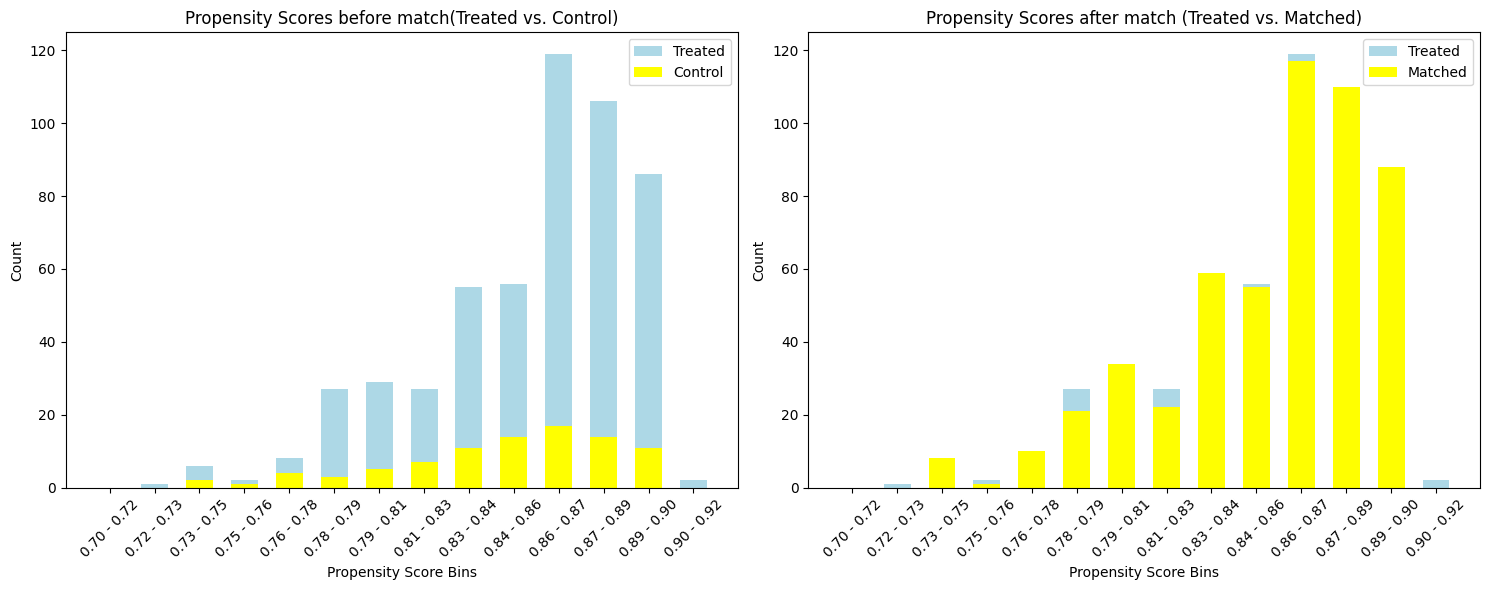

In [35]:
# Define bins
bins = np.linspace(0.7, 0.92, 15)
bar_width = 0.6

# Create subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# First plot: Comparison of treated and control groups before matching
treated_counts, _ = np.histogram(treated['propensity_score'], bins=bins)
control_counts, _ = np.histogram(control['propensity_score'], bins=bins)

index = np.arange(len(bins) - 1)
ax1.bar(index, treated_counts, bar_width, label='Treated', color='Lightblue')
ax1.bar(index, control_counts, bar_width, bottom=treated_counts, label='Control', color='Yellow')
ax1.set_title('Propensity Scores Before Matching (Treated vs. Control)')
ax1.set_xlabel('Propensity Score Bins')
ax1.set_ylabel('Count')
ax1.set_xticks(index)
ax1.set_xticklabels([f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(bins) - 1)], rotation=45)
ax1.legend()

# Second plot: Comparison of treated and matched groups after matching
treated_counts, _ = np.histogram(treated['propensity_score'], bins=bins)
matched_counts, _ = np.histogram(matched['propensity_score'], bins=bins)

index = np.arange(len(bins) - 1)
ax2.bar(index, treated_counts, bar_width, label='Treated', color='Lightblue')
ax2.bar(index, matched_counts, bar_width, bottom=treated_counts, label='Matched', color='Yellow')
ax2.set_title('Propensity Scores After Matching (Treated vs. Matched)')
ax2.set_xlabel('Propensity Score Bins')
ax2.set_ylabel('Count')
ax2.set_xticks(index)
ax2.set_xticklabels([f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(bins) - 1)], rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()



In [36]:
treated.reset_index(inplace=True)
matched.reset_index(inplace=True)

ATE = treated.y_ci - matched.y_ci


In [37]:
matched.head()

,index,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes,propensity_score,t_ci,y_ci
0,548,0,5000,0.0,103.0,360.0,True,False,True,False,True,False,False,True,False,True,False,0.860959,0.0,0
1,122,0,2137,8980.0,137.0,360.0,True,False,True,False,True,False,False,True,False,True,False,0.871551,0.0,1
2,554,0,3593,4266.0,132.0,180.0,False,True,False,True,True,False,True,False,False,True,False,0.864507,0.0,0
3,387,0,3010,3136.0,128.0,360.0,False,True,False,True,False,True,False,False,True,True,False,0.816808,0.0,0
4,499,0,6283,4416.0,209.0,360.0,False,True,True,False,True,False,True,False,False,True,False,0.860164,0.0,0


In [48]:
treated.head()

,index,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes,propensity_score,t_ci,y_ci
0,0,0,5849,0.0,128.0,360.0,False,True,True,False,True,False,False,False,True,True,False,0.860565,1.0,1
1,1,1,4583,1508.0,128.0,360.0,False,True,False,True,True,False,True,False,False,True,False,0.871086,1.0,0
2,2,0,3000,0.0,66.0,360.0,False,True,False,True,True,False,False,False,True,False,True,0.864520,1.0,1
3,3,0,2583,2358.0,120.0,360.0,False,True,False,True,False,True,False,False,True,True,False,0.816603,1.0,1
4,4,0,6000,0.0,141.0,360.0,False,True,True,False,True,False,False,False,True,True,False,0.860412,1.0,1


In [38]:
np.unique(ATE)

array([-1,  0,  1], dtype=int64)

In [39]:
ATE.mean()

0.6838095238095238

In [40]:
treated.y_ci.mean(), matched.y_ci.mean()

(0.7904761904761904, 0.10666666666666667)

In [71]:
treated.y_ci.sum() / len(treated.y_ci)

0.7904761904761904

In [72]:
matched.y_ci.sum() / len(matched.y_ci)

0.10666666666666667

Second Method: CausalModel 

In [74]:
#!pip install dowhy

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/383.4 kB ? eta -:--:--
   --------------------------------------- 383.4/383.4 kB 12.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/174.5 kB ? eta -:--:--
   --------------------------------------- 174.5/174.5 kB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------  1.0/1.0 MB 64.0 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 32.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.9 MB 33.8 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.9 MB 43.2 MB/s eta 0:00:01
   ---------------------- ----------------- 5.4/9.9 MB 43.4 MB/s eta 0:00:01
   --------------------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [51]:
import dowhy
from dowhy import CausalModel

In [52]:
X_ci.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes,propensity_score,t_ci,y_ci
0,0,5849,0.0,128.0,360.0,False,True,True,False,True,False,False,False,True,True,False,0.860565,1.0,1
1,1,4583,1508.0,128.0,360.0,False,True,False,True,True,False,True,False,False,True,False,0.871086,1.0,0
2,0,3000,0.0,66.0,360.0,False,True,False,True,True,False,False,False,True,False,True,0.864520,1.0,1
3,0,2583,2358.0,120.0,360.0,False,True,False,True,False,True,False,False,True,True,False,0.816603,1.0,1
4,0,6000,0.0,141.0,360.0,False,True,True,False,True,False,False,False,True,True,False,0.860412,1.0,1


In [53]:
base_columns = X_ci.columns
base_columns = list(base_columns)
base_columns.remove('t_ci')
base_columns.remove('y_ci')
base_columns.remove('propensity_score')
base_columns

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Education_Graduate',
 'Education_Not Graduate',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Self_Employed_No',
 'Self_Employed_Yes']

In [78]:
#!pip install graphviz

In [54]:
# Define the causal model
model = CausalModel(
    data=X_ci,
    treatment="t_ci",
    outcome="y_ci",
    common_causes=base_columns
)

# Estimate the causal effect using logistic regression for propensity score matching
estimate = model.estimate_effect(
    identified_estimand=model.identify_effect(proceed_when_unidentifiable=True),
    method_name="backdoor.propensity_score_matching",  # Use matching method
    target_units="ate",
    test_significance=True
)

# Output the estimated causal effect
print(estimate)


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                          
───────(E[y_ci|Loan_Amount_Term,Property_Area_Urban,Married_No,Self_Employed_Y
d[t_ci]                                                                       

                                                                              
es,Education_Graduate,Gender_Female,LoanAmount,CoapplicantIncome,Education_Not
                                                                              

                                                                              
 Graduate,Self_Employed_No,Property_Area_Semiurban,Dependents,Property_Area_Ru
                                                                              

                                             
ral,ApplicantIncome,Gender_Male,Married_Yes])
                                     

Estimated Results
Average Treatment Effect (ATE): 0.679. This indicates that, after controlling for all specified covariates, changing t_ci from 0 to 1 (i.e., from untreated to treated) will, on average, increase y_ci by 0.679 units.

p-value: Close to 0 (less than 0.001). This indicates that the effect is statistically significant, meaning we can be highly confident that this effect is not occurring by chance; t_ci genuinely has a significant impact on y_ci.

Conclusion
This analysis demonstrates that the treatment “credit” has a significant positive average effect on the outcome “loan”, and that this effect is statistically significant. This type of analysis is very powerful, especially as it shows a clear effect even after controlling for all possible known confounding factors.

# Performed causal inference to identify whether Applicant Income has influence on loan eligibility

In [41]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
0,0,5849,0.0,128.0,360.0,1.0,False,True,True,False,True,False,False,False,True,True,False
1,1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,True,False,True,False,False,True,False
2,0,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,True
3,0,2583,2358.0,120.0,360.0,1.0,False,True,False,True,False,True,False,False,True,True,False
4,0,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,False,False,False,True,True,False


In [42]:
X['SumIncome'] = X['ApplicantIncome'] + X['CoapplicantIncome']

In [57]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes,SumIncome
0,0,5849,0.0,128.0,360.0,1.0,False,True,True,False,True,False,False,False,True,True,False,5849.0
1,1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,True,False,True,False,False,True,False,6091.0
2,0,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,True,3000.0
3,0,2583,2358.0,120.0,360.0,1.0,False,True,False,True,False,True,False,False,True,True,False,4941.0
4,0,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,False,False,False,True,True,False,6000.0


In [58]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [43]:
y_a = y
t_a = X['SumIncome']
X_a = X.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'SumIncome'])

In [60]:
X_a.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
0,0,128.0,360.0,1.0,False,True,True,False,True,False,False,False,True,True,False
1,1,128.0,360.0,1.0,False,True,False,True,True,False,True,False,False,True,False
2,0,66.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,True
3,0,120.0,360.0,1.0,False,True,False,True,False,True,False,False,True,True,False
4,0,141.0,360.0,1.0,False,True,True,False,True,False,False,False,True,True,False


In [61]:
t_a.head()

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: SumIncome, dtype: float64

In [116]:
X_a = X_a.drop(columns=['t_a', 'y_a', 'score', 'score_quartile', 'propensity_score', 'weights'])

一定是算完propensity score，再把treatment和outcome加回去。也不能在算propensity score之前加，因为propensity score就是为了算condfounders

In [117]:
X_a.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
0,0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,1,0
1,1,128.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0
2,0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1
3,0,120.0,360.0,1.0,0,1,0,1,0,1,0,0,1,1,0
4,0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,1,0


In [112]:
# Check data types
print(X_a.dtypes)
print(y_a.dtype)

# Convert to float if necessary
X_a = X_a.apply(pd.to_numeric, errors='coerce')
y_a = pd.to_numeric(y_a, errors='coerce')

# Check data types after conversion
print(X_a.dtypes)
print(y_a.dtype)



Dependents                  object
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                 bool
Gender_Male                   bool
Married_No                    bool
Married_Yes                   bool
Education_Graduate            bool
Education_Not Graduate        bool
Property_Area_Rural           bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
Self_Employed_No              bool
Self_Employed_Yes             bool
score                      float64
score_quartile               int64
t_a                        float64
y_a                          int64
propensity_score           float64
weights                    float64
dtype: object
int64
Dependents                   int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                 bool
Gender_Male                   bool
Married_No                    bool


In [114]:
# Convert boolean types to integers
bool_cols = X_a.select_dtypes(include=['bool']).columns
X_a[bool_cols] = X_a[bool_cols].astype(int)

# Ensure all variables are numeric types
X_a = X_a.apply(pd.to_numeric, errors='coerce')

# Check data types again
print(X_a.dtypes)


Dependents                   int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                int32
Gender_Male                  int32
Married_No                   int32
Married_Yes                  int32
Education_Graduate           int32
Education_Not Graduate       int32
Property_Area_Rural          int32
Property_Area_Semiurban      int32
Property_Area_Urban          int32
Self_Employed_No             int32
Self_Employed_Yes            int32
score                      float64
score_quartile               int64
t_a                        float64
y_a                          int64
propensity_score           float64
weights                    float64
dtype: object


In [119]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

# Estimate propensity scores using linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_a, t_a)
X_a['propensity_score'] = lin_reg.predict(X_a)

# Calculate weights
X_a['weights'] = 1 / (1 + np.exp(-X_a['propensity_score']))  # Use logistic function to handle continuous scores

# Perform weighted least squares regression with weighted data
weighted_model = sm.WLS(y_a, sm.add_constant(X_a), weights=X_a['weights']).fit()
print(weighted_model.summary())


                            WLS Regression Results                            
Dep. Variable:            Loan_Status   R-squared:                       0.319
Model:                            WLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     28.26
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.78e-44
Time:                        23:02:24   Log-Likelihood:                -281.22
No. Observations:                 614   AIC:                             584.4
Df Residuals:                     603   BIC:                             633.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Dependents                

The weighted least squares (WLS) regression results reveal key statistical metrics and model diagnostics, reflecting the overall quality of the model and the impact of each explanatory variable on the outcome variable (Loan_Status). Here are the main interpretations of the results:

Model Statistics:
R-squared (R²): 0.319 - This indicates that the model explains approximately 31.9% of the variability in the response variable. This suggests that while the model has some explanatory power, there is significant room for improvement.
Adjusted R-squared: 0.308 - The adjusted R², which is more appropriate for comparing models with different numbers of predictors, shows a similar level of explanatory power.
F-statistic: 1.78e-44 - This very small p-value indicates that the overall model is statistically significant.
Variable Coefficients and Statistical Significance:
Credit_History (Coefficient: 0.6965, Significant) - Applicants with good credit history are more likely to be approved for a loan.
Married_Yes (Significant) - Being married increases the likelihood of loan approval.
Education_Graduate (Significant) - Applicants with higher education are more likely to be approved for a loan.
Property_Area_Semiurban (Coefficient: 0.0904, Significant) - Applicants from semi-urban areas are more likely to be approved for a loan.
Other Variables (e.g., Gender_Female, Gender_Male, Dependents) - These variables are not statistically significant, indicating they contribute less to the prediction.
Model Diagnostics:
Durbin-Watson: 1.954 - Close to 2, suggesting low autocorrelation of residuals.
Condition Number: 1.11e+20 - Extremely high, indicating potential severe multicollinearity issues. This could be due to highly correlated explanatory variables, warranting further data inspection or model adjustment.
Jarque-Bera Test - Indicates that residuals do not follow a normal distribution, which may affect the validity of some statistical inferences.
These results provide a comprehensive overview of the model's performance and highlight areas for potential improvement.